In [6]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
from IPython.display import clear_output

# Dataset

This is a sequence to class output that is to be obtained. The aim is to predict the nationality based on the given name.

In [10]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt', 'r') as f:
    for line in f:                  # Going through each line and splitting thorugh ','.
        line = line.split(",")
        name = line[0].strip()      # Remove left an right whitespace from the name and lang after splitting.
        lang = line[1].strip()
        if lang not in languages:
            languages.append(lang)
        X.append(name)
        y.append(lang)
        data.append((name, lang))   # Appending to data the tuples of name and lang.

n_languages = len(languages)

In [11]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt', 'r') as f: 
    for line in f:
        line = line.split(',')
        name = line[0].strip()
        lang = line[1].strip()
        if not lang in languages:
            languages.append(lang)
        X.append(name)
        y.append(lang)
        data.append((name, lang))

n_languages = len(languages)

In [12]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [13]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


### Train-test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [15]:
print(X_train)

['Abashkin', 'Gulimov', 'Tzelobenok', 'Funnell', 'Zhui', 'Jukes', 'Togunov', 'Sabbag', 'Kartomyshev', 'Makhnenko', 'Sokolsky', 'Masuno', 'Varela', 'Moffat', 'Bonner', 'Berezovsky', 'Helkvist', 'Thurston', 'Tovstuha', 'Millar', 'Tulintsev', 'Furey', 'Isaenko', 'Kalachev', 'Takecare', 'Newcombe', 'Taku', 'Artibyakin', 'Saifulov', 'Morcos', 'Jagodnikov', 'Halifman', 'Bagaryakoff', 'Pavluhin', 'Mari', 'Awramchik', 'Agaltsov', 'Fisichev', 'Shizuma', 'Yankin', 'Luts', 'Toshitala', 'Germain', 'Botros', 'Poulter', 'Lischenko', 'Porter', 'Melendez', 'Ibu', 'Carr', 'Ursler', 'Aderikhin', 'Gimondi', 'Rzhevsky', 'Slater', 'Atkin', 'Yagafarov', 'Huraskin', 'Underhill', 'Pylin', 'Yuschenko', 'Ardovini', 'Tunison', 'Dobrovolsky', 'Bezyzvestnyh', 'Roussel', 'Balakshin', 'Trumbauer', 'Vallance', 'Boerio', 'Waugh', 'Baz', 'Reading', 'Komon', 'Ireson', 'Venables', 'Tikhotsky', 'Spada', 'Winfield', 'Mikhnov', 'Lubsky', 'Antar', 'Sheehan', 'Tuma', 'Yuzefovich', 'Yamburg', 'Yukhvidov', 'Mikhail', 'Chi', 'De

In [16]:
print(len(X_train), len(X_test))

16040 4010


### Encoding names and language

List of all characters we can find in a name is stored in All_letters. Sometimes ( whitespace or , or . or ; ) maybe encountered.

In [17]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

To represent a name in tensor, we take the given name and creates a Representation Tensor of size = ( Length of name , 1, no of letters). Afterwards, we go through each character of the name and identify the position of that character in 'All_letters'

In [18]:
def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters)      
    for index, letter in enumerate(name):
        pos = all_letters.find(letter)
        rep[index][0][pos] = 1
    return rep

In [19]:
def lang_rep(lang):
    return torch.tensor( [languages.index(lang)], dtype = torch.long)

Represented in Tensor form with first 26 lowercase letters and next 26 uppercase letters for a character. 

In [20]:
name_rep("Abreu")

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [21]:
lang_rep("Portuguese")

tensor([0])

### Basic visualisation

In [22]:
count = {}

for l in languages:
    count[l] = 0        # Keys = Languages

for d in data:
    count[d[1]] += 1    # Counting the occurences of each languages. 

In [23]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


Here there is more Russian and English classes than others.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


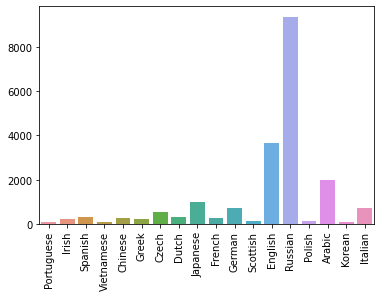

In [24]:
plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

# Basic network and testing inference

Hidden state of each time step is different. It is a hyperparameter and something that is user specified. 
</br>Output size = No of languages.

In [25]:
class  RNN_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        self.hidden_size = hidden_size
        # Creating 2 fully connected layers. (Refer to video/ image for RNN model if needed.)
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, input_, hidden): 
        combined = torch.cat((input_, hidden), 1)     # Concat along axis = 1
        # Computing hidden and output in the forward pass.
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    # Additional Function to initialise the hidden layer.
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

Input size = No of letters.
<br>Hidden size = as specified by user.
<br>Output size = No of languages.

In [26]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)

Doing some inference before training. For other models, inference is output = model(input) but here that is not the case.

In [27]:
def infer(net, name):
    net.eval()
    name_ohe = name_rep(name)       # Computing One-hot encoding of the name.
    hidden = net.init_hidden()      # Initialising the hidden vector.

    # Size of name_ohe  = (no of char, 1, no of letters). So name_ohe.size()[0] will give the no of characters in the name.
    for i in range( name_ohe.size()[0]): 
        # For each char in name, one forward pass will be done and 1 final output at the end of RNN process.       
        output, hidden = net( name_ohe[i], hidden)  
    
    return output

In [28]:
output = infer(net, 'Adam')
index = torch.argmax(output)
print(output, index)

tensor([[-2.8720, -2.8213, -2.9954, -2.8808, -2.8453, -2.9365, -2.8793, -2.8994,
         -2.9651, -2.8941, -2.9553, -2.9009, -2.9078, -2.9153, -2.8252, -2.8150,
         -2.8659, -2.8731]], grad_fn=<LogSoftmaxBackward>) tensor(15)


# Evaluate model

Dataloader is used to give randomized set of names. 'npoints' is the no of points to generate from the data (X, y).

In [29]:
def dataloader(npoints, X_, y_):
    to_ret = []                 # List to return.
    for i in range(npoints):
        index = np.random.randint(len(X_))      # A random index from 1 till Len(X) to select a datapoint. 
        name, lang = X_[index], y_[index]
        to_ret.append( (name, lang, name_rep(name), lang_rep(lang)) )
    return to_ret 

In [30]:
dataloader(2, X_train, y_train)

[('Werner',
  'German',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

Evaluation is done for particular network on 'n_points'. 'k' is the metric to select top-k acuracy.

In [31]:
def eval(net, n_points, k, X_, y_):
    
    data_ = dataloader(n_points, X_, y_)    # Taking n points from data.
    correct = 0

    for name, lang, name_ohe, lang_rep in data_:

        output = infer(net, name)           # Infer for the data and do the softmax to obtain the output.
        val, indices = output.topk(k)       # Selecting the value and indices for top-k values.

        if lang_rep in indices:             # Checking if original ground truth 'Lang' belongs to list of top-k indices or not.
            correct += 1
    
    accuracy = correct / n_points
    return accuracy

In [32]:
eval(net, 1000, 3, X_test, y_test)

0.057

# Training

### Basic setup

With a particular criterion i.e. loss function and optimization method and no of datapoints, the training is done.
<br>Backpropogation through time is done by Pytorch.

This train module works for a given batch.

In [33]:
def train(net, opt, criterion, n_points):
    
    # Setting gradients to 0 and total loss to 0.
    opt.zero_grad()
    total_loss = 0

    # Generating data to train from X,y.
    data_ = dataloader(n_points, X_train, y_train)

    # Iterating through data.
    for name, language, name_ohe, lang_rep in data_:

        hidden = net.init_hidden()

        # For each character of input, the output and hidden is computed.
        for i in range( name_ohe.size()[0] ):
            output, hidden = net(name_ohe[i], hidden)
        
        # Loss criterion with output and true language labels.
        loss = criterion(output, lang_rep)
        loss.backward(retain_graph=True)
        
        total_loss += loss
    
    # Updating weight and biases.
    opt.step()  

    return total_loss / n_points

In [34]:
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [35]:
%%time 
train(net, opt, criterion, 200)

CPU times: user 201 ms, sys: 41.3 ms, total: 243 ms
Wall time: 271 ms


tensor(2.9149, grad_fn=<DivBackward0>)

In [36]:
eval(net, 1000, 1, X_test, y_test)

0.506

### Full Training setup

At a higher level, the below training setup is used which takes all the hyperparameters like lr, batch_size and display every few iterations.

In [37]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=5):
    
    # Criterion for loss and Optimization is specified.
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

    # Loss array to store the loss for each no of batches.
    loss_arr = np.zeros(n_batches + 1)

    for i in range(n_batches):
        loss_arr[i+1] = (loss_arr[i] * i + train(net, opt, criterion, batch_size) )/ (i+1)

        if i % display_freq == display_freq -1:
            clear_output(wait = True)

            # Printing Iteration, top-1, top-2 and loss for ith iteration.
            print('Iteration', i, 'Top-1:', eval(net, len(X_test), 1, X_test, y_test), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test), 'Loss', loss_arr[i])
            # Plotting loss vs iteration.
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')
    

Iteration 99 Top-1: 0.6810473815461346 Top-2: 0.7698254364089776 Loss 1.4460766315460205


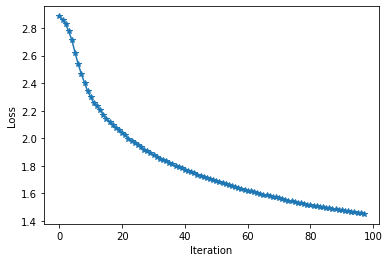

In [38]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

# LSTM Cell

Doc : https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

In addition to input and hidden layer size, we have cell state here which should be initialized before hand.
<br> The $c_t$ in Pytorch refers to $s_t$ from the LSTM representation.

In terms of function signature LSTM and RNN should be equivalent even though internal mechanism is different.

In [39]:
class LSTM_net(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax( dim = 2)

    def forward(self, input_, hidden):
        """
        Input is reshaped into tensor -> 
        (1 input simaltanously i.e. 1 char at a time, 1 batch, 
        whatver dimension is left we flatten it out to last dimension = as many letters in rep of given char) 
        """
        out, hidden = self.lstm_cell( input_.view(1,1,-1), hidden)
        # out is the output of LSTM which is ignored.
        # Final output is applied only for hidden[0] which is for the hidden state.
        output = self.h2o(hidden[0])
        output = self.softmax(output)
        return output.view(1, -1), hidden

    # Two tensors i.e. 1st for hidden state and 2nd for the cell state.
    def init_hidden(self):
        # For hidden state  --> 1st index : no of layers = 1 in our case, 2nd index : no of batches we want = 1 in our case, 3rd index : hidden size
        # For cell state    --> 1st index : no of layers = 1 in our case, 2nd index : no of batches = 1 , 3rd index : cell size
        return ( torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size) )
        

Iteration 99 Top-1: 0.5458852867830424 Top-2: 0.6900249376558604 Loss 1.811164140701294


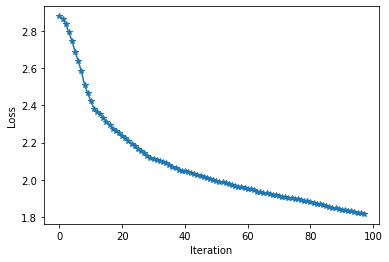

In [40]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr = 0.0005, n_batches= 100, batch_size= 256) 

# GRU Cell

Doc : https://pytorch.org/docs/stable/generated/torch.nn.GRU.html

The $h_t$ in Pytorch refers to $s_t$ from the GRU representation. Only the hidden state is preserved. There is no cell state here.

In [41]:
class GRU_net(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_net, self).__init__()
        self.hidden_size = hidden_size
        self.gru_cell = nn.GRU(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax( dim = 2)

    def forward(self, input_, hidden):
        out, hidden = self.gru_cell( input_.view(1,1,-1), hidden)   # Input (no of char, no of batches, encoding size per char) is similiar to LSTM.
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output.view(1, -1), hidden   # Output is reshaped to 1, no of languages that is present in dataset.

    # Only 1 tensor for the hidden state, since there is no cell state here, with same dimenions.
    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

Iteration 99 Top-1: 0.5992518703241895 Top-2: 0.7314214463840399 Loss 1.6405688524246216


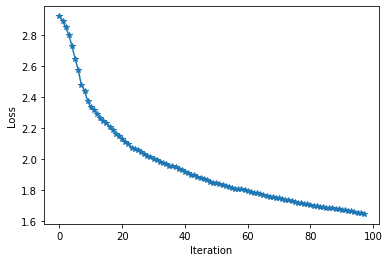

In [42]:
n_hidden = 128
net = GRU_net(n_letters, n_hidden, n_languages)
train_setup(net, lr = 0.0005, n_batches= 100, batch_size= 256) 